In [1]:
%pip install tensorflow
 

In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist

In [3]:
#loading dataset
(x_train,y_train) , (x_test,y_test) = mnist.load_data()


In [4]:
# reshaping and normalizing dataset

x_train = x_train[:20000].reshape(-1,28,28,1)
x_test = x_test[:20000].reshape(-1,28,28,1)

x_train = x_train/255.0
x_test = x_test/255.0


In [5]:
# Define Model 

model = models.Sequential([
    #input : 28x28 grayscale image
    
    #32 filters learn basic edges
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    # 64 filters learn complex shapes, pooling reduce size and prevent overfit
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    # 128 filters learn digit patterns
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(10,activation='softmax')
])

c:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# model training 
y_train = y_train[:20000]
y_test = y_test[:20000]


In [12]:
history=model.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 64,
    validation_data = (x_test,y_test)

)
    

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9969 - loss: 0.0097 - val_accuracy: 0.9880 - val_loss: 0.0486
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9981 - loss: 0.0060 - val_accuracy: 0.9873 - val_loss: 0.0572
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9981 - loss: 0.0057 - val_accuracy: 0.9867 - val_loss: 0.0660
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9965 - loss: 0.0098 - val_accuracy: 0.9879 - val_loss: 0.0529
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9965 - loss: 0.0097 - val_accuracy: 0.9873 - val_loss: 0.0472
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9872 - val_loss: 0.0550
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9982 - loss: 0.0062 - val_accuracy: 0.9901 - val_loss: 0.0470
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accu

In [9]:
model.save("digit_model.h5")

In [10]:
#Evaluate on test set 
test_loss, test_accuracy = model.evaluate(x_test,y_test,verbose=1)
print("Test loss :" , test_loss)
print("test accuracy :",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9877 - loss: 0.0478
Test loss : 0.04782972112298012
test accuracy : 0.9876999855041504


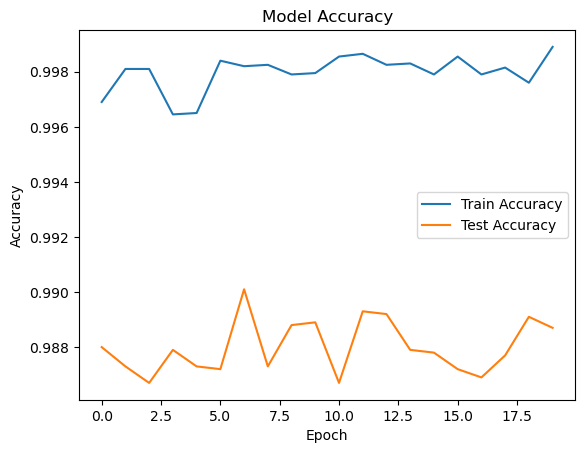

In [13]:
import matplotlib.pyplot as plt

#plt accuracy
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()